In [1]:
import matplotlib.pyplot as plt
import supy as sp
import pandas as pd
import numpy as np
from pathlib import Path
from night import night
from dict_legend import dict_var_disp, dict_var_ylabel, dict_var_title
get_ipython().run_line_magic('matplotlib', 'inline')
get_ipython().run_line_magic('config', "InlineBackend.figure_format = 'svg'")

In [36]:
sp.show_version()

SuPy versions
-------------
supy: 2020.5.25dev
supy_driver: 2020a8

SYSTEM DEPENDENCY

INSTALLED VERSIONS
------------------
commit           : None
python           : 3.7.0.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
machine          : AMD64
processor        : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.None

pandas           : 1.0.3
numpy            : 1.18.3
pytz             : 2019.3
dateutil         : 2.8.1
pip              : 20.1.1
setuptools       : 45.2.0
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.3.3
html5lib         : None
pymysql          : None
psycopg2         : 2.8.4 (dt dec pq3 ext lo64)
jinja2           : 2.11.1
IPython          : 7.14.0
pandas_datareader: None
bs4              : None
bott

In [2]:
# _s for sample data
path_runcontrol = Path('baserun')/ 'RunControl_ERA5.nml'
path_runcontrol_s = Path('baserun')/ 'RunControl.nml'
path_runcontrol_w = Path('baserun')/ 'RunControl_W.nml'

df_state_init = sp.init_supy(path_runcontrol)
df_state_init_s = sp.init_supy(path_runcontrol_s)
df_state_init_w = sp.init_supy(path_runcontrol_w)

grid = df_state_init.index[0]

df_forcing = sp.load_forcing_grid(path_runcontrol, grid)
df_forcing_s = sp.load_forcing_grid(path_runcontrol_s, grid)
df_forcing_w = sp.load_forcing_grid(path_runcontrol_w, grid)


2020-07-01 11:24:51,699 - SuPy - INFO - All cache cleared.
2020-07-01 11:24:53,245 - SuPy - INFO - All cache cleared.
2020-07-01 11:24:54,854 - SuPy - INFO - All cache cleared.
2020-07-01 11:24:56,431 - SuPy - INFO - All cache cleared.
2020-07-01 11:24:59,352 - SuPy - INFO - All cache cleared.
2020-07-01 11:25:01,845 - SuPy - INFO - All cache cleared.


#### Examine Forcing data ERA-5 London

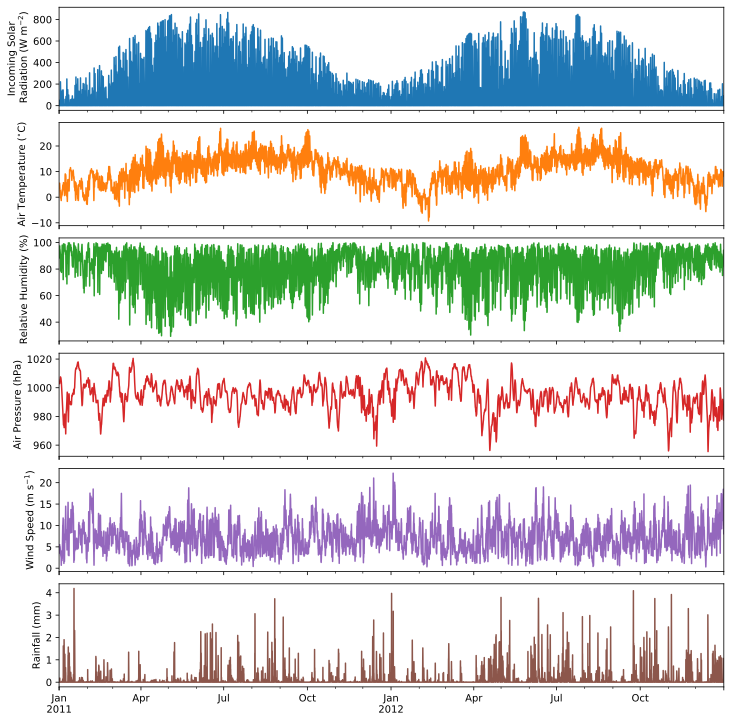

In [3]:
list_var_forcing = [
    'kdown',
    'Tair',
    'RH',
    'pres',
    'U',
    'rain',
]
dict_var_label = {
    'kdown': 'Incoming Solar\n Radiation ($ \mathrm{W \ m^{-2}}$)',
    'Tair': 'Air Temperature ($^{\circ}}$C)',
    'RH': r'Relative Humidity (%)',
    'pres': 'Air Pressure (hPa)',
    'rain': 'Rainfall (mm)',
    'U': 'Wind Speed (m $\mathrm{s^{-1}}$)'
}
df_plot_forcing_x = df_forcing_w.loc[:, list_var_forcing].copy().shift(
    -1).dropna(how='any')
df_plot_forcing = df_plot_forcing_x.resample('1h').mean()
df_plot_forcing['rain'] = df_plot_forcing_x['rain'].resample('1h').sum()

axes = df_plot_forcing.plot(
    subplots=True,
    figsize=(10, 12),
    legend=False,
)
fig = axes[0].figure
fig.tight_layout()
fig.autofmt_xdate(bottom=0.2, rotation=0, ha='center')
for ax, var in zip(axes, list_var_forcing):
    ax.set_ylabel(dict_var_label[var])

In [4]:
#Investigate diffrence between ERA5 and Sampledata
df_forcing_era5 = df_forcing.add_suffix('_era5')
df_forcing_s_s = df_forcing_s.add_suffix('_s')
df_forcing_w_w = df_forcing_w.add_suffix('_w')
# _m for merge
df_forcing_m = pd.concat([df_forcing_era5, df_forcing_s_s,df_forcing_w_w],axis=1, join='inner')

June


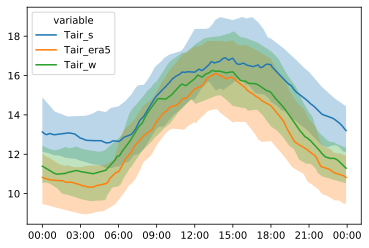

In [5]:
# Tair comparison June
s = '2012 6'
e = '2012 6'
ax=sp.util.plot_day_clm(df_forcing_m.loc[s:e,['Tair_s','Tair_era5','Tair_w']])
print('June')

July


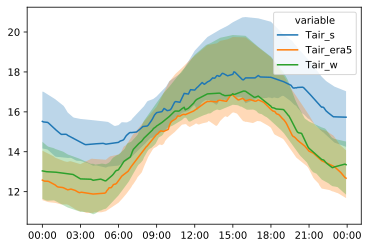

In [6]:
# Tair comparison July
s = '2012 7'
e = '2012 7'
ax=sp.util.plot_day_clm(df_forcing_m.loc[s:e,['Tair_s','Tair_era5','Tair_w']])
print('July')

August


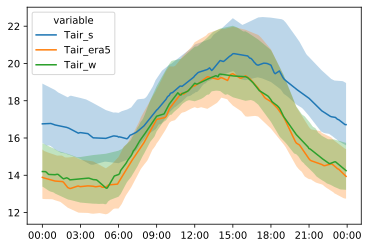

In [7]:
# Tair Comparison August
s = '2012 8'
e = '2012 8'
ax=sp.util.plot_day_clm(df_forcing_m.loc[s:e,['Tair_s','Tair_era5','Tair_w']])
print('August')

June - August


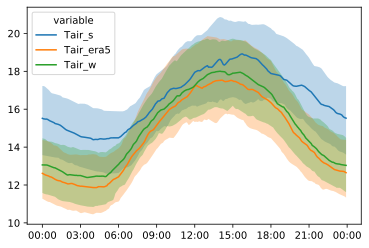

In [8]:
# Tair Comparison June-August
s = '2012 6'
e = '2012 8'
ax=sp.util.plot_day_clm(df_forcing_m.loc[s:e,['Tair_s','Tair_era5','Tair_w']])
print('June - August')

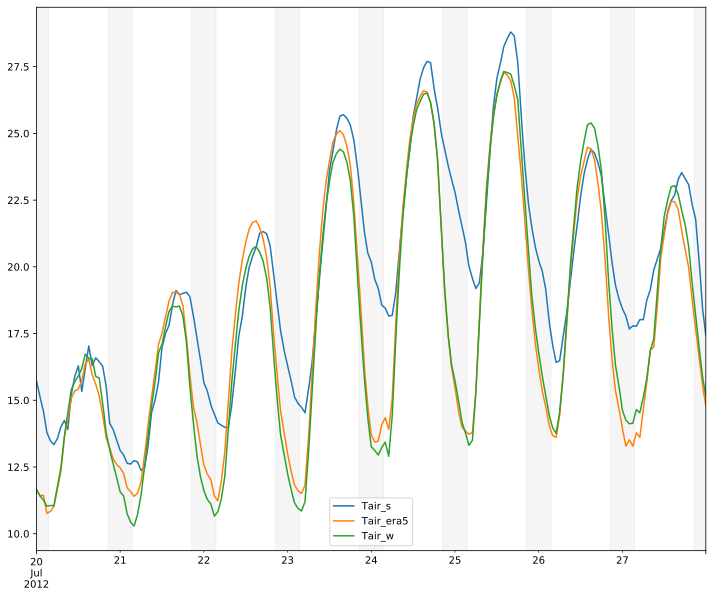

In [9]:
# Tair from selected days

s = '2012 07 20'
e = '2012 07 27'
ax_output = df_forcing_m.loc[s:e,['Tair_s','Tair_era5','Tair_w']].plot(figsize=(12,10))
night(ax_output)


#### Three scenario Used
 1. Initial conditions used in sample data - Used Suffix: none
 2. Building fraction = 0. grass = .41 - Population day/night = 0 - Used Suffix: _r         ("Rural" Conditions)
 3. Building fraction = 0.05 grass = .36 - Population day/night = 5% of initial - Used Suffix: _rb      ("Rural"conditions with Building)


In [10]:
df_state_r = df_state_init.copy()
df_state_r.loc[:, ('sfr', '(1,)')] = 0.0000000001 #Building
df_state_r.loc[:, ('sfr', '(4,)')] = 0.400000009 #Grass
df_state_r.popdensdaytime = 0
df_state_r.popdensnighttime = 0 
sp.check_state(df_state_r)

df_state_rb = df_state_init.copy()
df_state_rb.loc[:, ('sfr', '(1,)')] = .05 #Building
df_state_rb.loc[:, ('sfr', '(4,)')] = 0.36 #Grass
df_state_rb.popdensdaytime = df_state_init.popdensdaytime * 0.05
df_state_rb.popdensnighttime = df_state_init.popdensnighttime * 0.05 
sp.check_state(df_state_rb)
sp.check_forcing(df_forcing_w)

2020-07-01 11:25:09,359 - SuPy - INFO - SuPy is validating `df_state`...
2020-07-01 11:25:09,562 - SuPy - INFO - All checks for `df_state` passed!
2020-07-01 11:25:09,578 - SuPy - INFO - SuPy is validating `df_state`...
2020-07-01 11:25:09,781 - SuPy - INFO - All checks for `df_state` passed!
2020-07-01 11:25:09,781 - SuPy - INFO - SuPy is validating `df_forcing`...
2020-07-01 11:25:14,358 - SuPy - INFO - All checks for `df_forcing` passed!


In [11]:
# Run SuPy initial conditions
df_output, df_state_final = sp.run_supy(df_forcing_w, df_state_init)
df_output_suews = df_output['SUEWS']

# Run SuPy with modified environment add _r for recognition later on
df_r_output, df_state_r_final = sp.run_supy(df_forcing_w, df_state_r)
df_r_output_suews = df_r_output['SUEWS']
df_r_output_suews = df_r_output_suews.add_suffix('_r')

# Run SuPy with modified environment add _rb for recognition later on
df_rb_output, df_state_rb_final = sp.run_supy(df_forcing_w, df_state_rb)
df_rb_output_suews = df_rb_output['SUEWS']
df_rb_output_suews = df_rb_output_suews.add_suffix('_rb')

2020-07-01 11:25:14,373 - SuPy - INFO - ====================
2020-07-01 11:25:14,373 - SuPy - INFO - Simulation period:
2020-07-01 11:25:14,373 - SuPy - INFO -   Start: 2010-12-31 23:05:00
2020-07-01 11:25:14,373 - SuPy - INFO -   End: 2013-01-01 00:00:00
2020-07-01 11:25:14,373 - SuPy - INFO - 
2020-07-01 11:25:14,373 - SuPy - INFO - No. of grids: 1
2020-07-01 11:25:14,373 - SuPy - INFO - SuPy is running in serial mode
2020-07-01 11:26:09,747 - SuPy - INFO - Execution time: 55.4 s
2020-07-01 11:26:09,747 - SuPy - INFO - ====================

2020-07-01 11:26:09,747 - SuPy - INFO - ====================
2020-07-01 11:26:09,747 - SuPy - INFO - Simulation period:
2020-07-01 11:26:09,747 - SuPy - INFO -   Start: 2010-12-31 23:05:00
2020-07-01 11:26:09,747 - SuPy - INFO -   End: 2013-01-01 00:00:00
2020-07-01 11:26:09,747 - SuPy - INFO - 
2020-07-01 11:26:09,763 - SuPy - INFO - No. of grids: 1
2020-07-01 11:26:09,763 - SuPy - INFO - SuPy is running in serial mode
2020-07-01 11:27:23,830 - S

In [12]:
# RSL
df_output_rsl = df_output['RSL']
df_output_rsl_g = df_output_rsl.loc[grid]
df_output_rsl_r = df_r_output['RSL']
df_output_rsl_r = df_output_rsl_r.add_suffix('_r')
df_output_rsl_r_g = df_output_rsl_r.loc[grid]
df_output_rsl_rb = df_rb_output['RSL']
df_output_rsl_rb = df_output_rsl_rb.add_suffix('_rb')
df_output_rsl_rb_g = df_output_rsl_rb.loc[grid]

In [13]:
# Merge to one dataframe for easier plotting
df_output_suews_g = df_output_suews.loc[grid]
df_r_output_suews_g = df_r_output_suews.loc[grid]
df_rb_output_suews_g = df_rb_output_suews.loc[grid]

df_merge = pd.concat([df_output_suews_g, df_r_output_suews_g,df_rb_output_suews_g],axis=1,join='inner')
df_rsl = pd.concat([df_output_rsl_g,df_output_rsl_r_g,df_output_rsl_rb_g],axis=1,join='inner')

# Calculate Diffrence (Initial) - (Scenario) = Suffix used  _d or Δ 

In [14]:
init_col = list(df_output_suews)
r_col = list(df_r_output_suews)
rb_col = list(df_rb_output_suews)

for i, rd, r, rbd, rb in zip(init_col,[sub + '_d' for sub in r_col],r_col,[sub + '_d' for sub in rb_col],rb_col):
    df_merge[rd] = df_merge[i] - df_merge[r]
    df_merge[rbd] = df_merge[i] - df_merge[rb]

## For closer analysis, a timespan from 20th of july to 29th of july is chosen. The period is characterised by having calm and clear days with low wind from 22-27th july

In [15]:
# Start and end date
s = '2012 07 20'
e = '2012 07 29'
size = 10, 10
clr= ('#ff7f0e','#2ca02c')

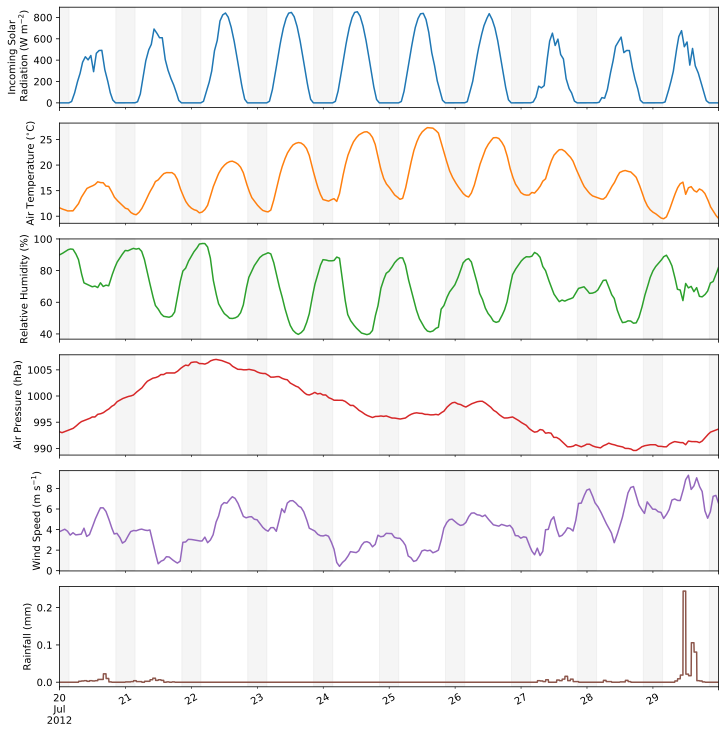

In [37]:
df_plot_forcing_x = df_forcing_w.loc[s:e, list_var_forcing].copy().shift(
    -1).dropna(how='any')
axes = df_plot_forcing_x.plot(
    subplots=True,
    figsize=(10, 12),
    legend=False,
)
fig = axes[0].figure
fig.tight_layout()
fig.autofmt_xdate(bottom=0.2, rotation=0, ha='center')
for ax, var in zip(axes, list_var_forcing):
    ax.set_ylabel(dict_var_label[var])
    night(ax)
    
# Shading used to indicate night (as time when sun is not present)

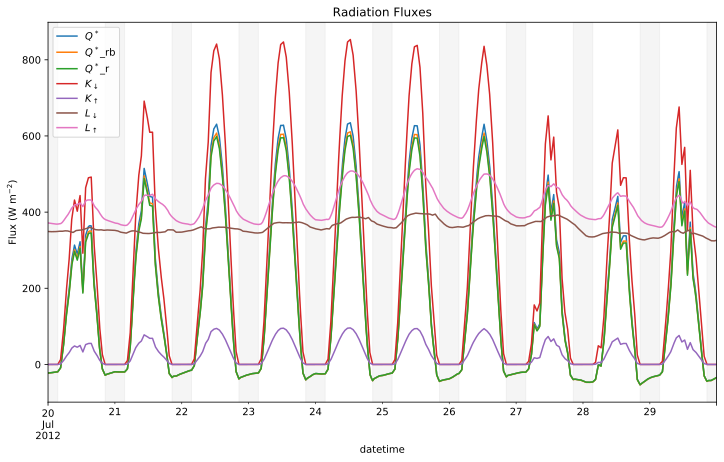

In [17]:
ax_output = df_merge.loc[s:e,['QN','QN_rb','QN_r','Kdown', 'Kup', 'Ldown', 'Lup']].rename(columns=dict_var_disp).plot(figsize=(12,7))
ax_output.set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
ax_output.legend()
plt.title('Radiation Fluxes')
night(ax_output)

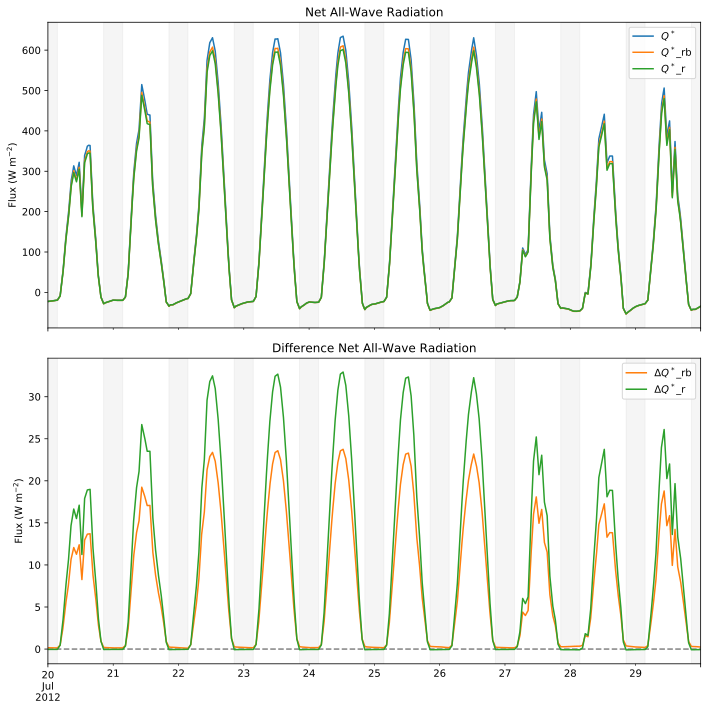

In [18]:
# Choose variable to plot as var
var = 'QN'

fig, axes = plt.subplots(2, 1, sharex=True)
a = df_merge.loc[s:e,[var,(var +'_rb'),(var +'_r')]].rename(columns=dict_var_disp)\
    .plot(ax=axes[0],figsize=(size),title=dict_var_title[var])
b = df_merge.loc[s:e,[(var+'_rb_d'),(var +'_r_d') ]].rename(columns=dict_var_disp)\
    .plot(ax=axes[1],figsize=(size),title=('Difference ' + dict_var_title[var]),color=clr)
plt.hlines(0,s,'2012 08',linestyles='--',colors='grey')

for i in [a,b]:
    night(i)
    i.legend()
    i.set_ylabel(dict_var_ylabel[var])
    i.set_xlabel('')
fig.tight_layout()

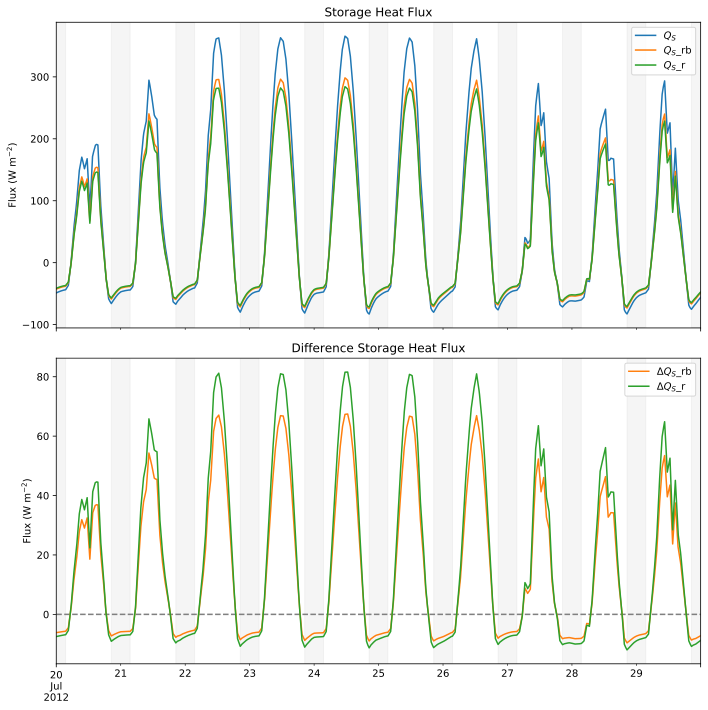

In [19]:
var = 'QS'
fig, axes = plt.subplots(2, 1, sharex=True)
a = df_merge.loc[s:e,[var,(var +'_rb'),(var +'_r')]].rename(columns=dict_var_disp)\
    .plot(ax=axes[0],figsize=(size),title=dict_var_title[var])
b = df_merge.loc[s:e,[(var+'_rb_d'),(var +'_r_d') ]]\
    .rename(columns=dict_var_disp)\
    .plot(ax=axes[1],figsize=(size),title=('Difference ' + dict_var_title[var]),color=clr)
plt.hlines(0,s,'2012 08',linestyles='--',colors='grey')

for i in [a,b]:
    night(i)
    i.legend()
    i.set_ylabel(dict_var_ylabel[var])
    i.set_xlabel('')
fig.tight_layout()

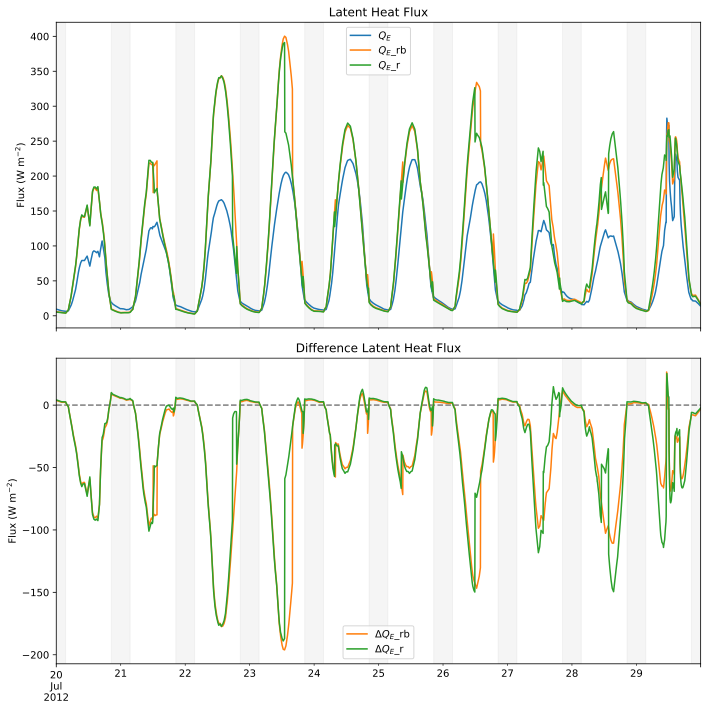

In [20]:
var = 'QE'
fig, axes = plt.subplots(2, 1, sharex=True)
a = df_merge.loc[s:e,[var,(var +'_rb'),(var +'_r')]].rename(columns=dict_var_disp).\
    plot(ax=axes[0],figsize=(size),title=dict_var_title[var])
b = df_merge.loc[s:e,[(var+'_rb_d'),(var +'_r_d') ]]\
    .rename(columns=dict_var_disp)\
    .plot(ax=axes[1],figsize=(size),title=('Difference ' + dict_var_title[var]),color=clr)
plt.hlines(0,s,'2012 08',linestyles='--',colors='grey')

for i in [a,b]:
    night(i)
    i.legend()
    i.set_ylabel(dict_var_ylabel[var])
    i.set_xlabel('')
fig.tight_layout()

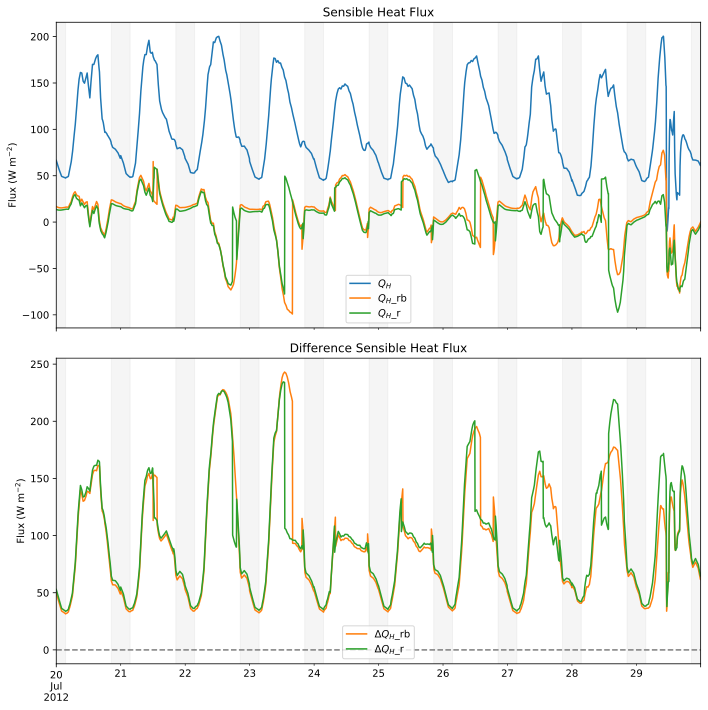

In [21]:
var = 'QH'
fig, axes = plt.subplots(2, 1, sharex=True)
a = df_merge.loc[s:e,[var,(var +'_rb'),(var +'_r')]].rename(columns=dict_var_disp)\
    .plot(ax=axes[0],figsize=(size),title=dict_var_title[var])
b = df_merge.loc[s:e,[(var+'_rb_d'),(var +'_r_d') ]].rename(columns=dict_var_disp)\
    .plot(ax=axes[1],figsize=(size),title=('Difference ' + dict_var_title[var]),color=clr)
plt.hlines(0,s,'2012 08',linestyles='--',colors='grey')

for i in [a,b]:
    night(i)
    i.legend()
    i.set_ylabel(dict_var_ylabel[var])
    i.set_xlabel('')
fig.tight_layout()

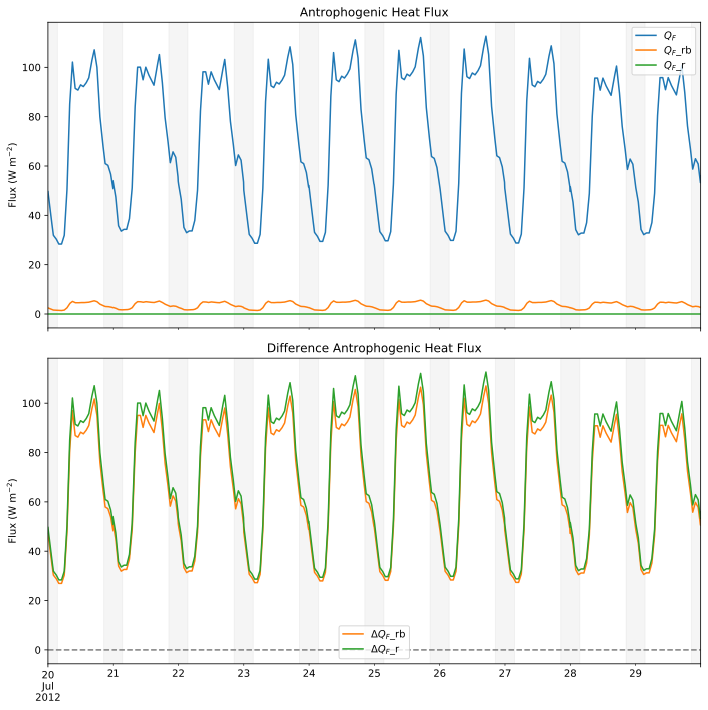

In [22]:
var = 'QF'
fig, axes = plt.subplots(2, 1, sharex=True)
a = df_merge.loc[s:e,[var,(var +'_rb'),(var +'_r')]].rename(columns=dict_var_disp)\
    .plot(ax=axes[0],figsize=(size),title=dict_var_title[var])
b = df_merge.loc[s:e,[(var+'_rb_d'),(var +'_r_d') ]].rename(columns=dict_var_disp)\
    .plot(ax=axes[1],figsize=(size),title=('Difference ' + dict_var_title[var]),color=clr)
plt.hlines(0,s,'2012 08',linestyles='--',colors='grey')

for i in [a,b]:
    night(i)
    i.legend()
    i.set_ylabel(dict_var_ylabel[var])
    i.set_xlabel('')
fig.tight_layout()

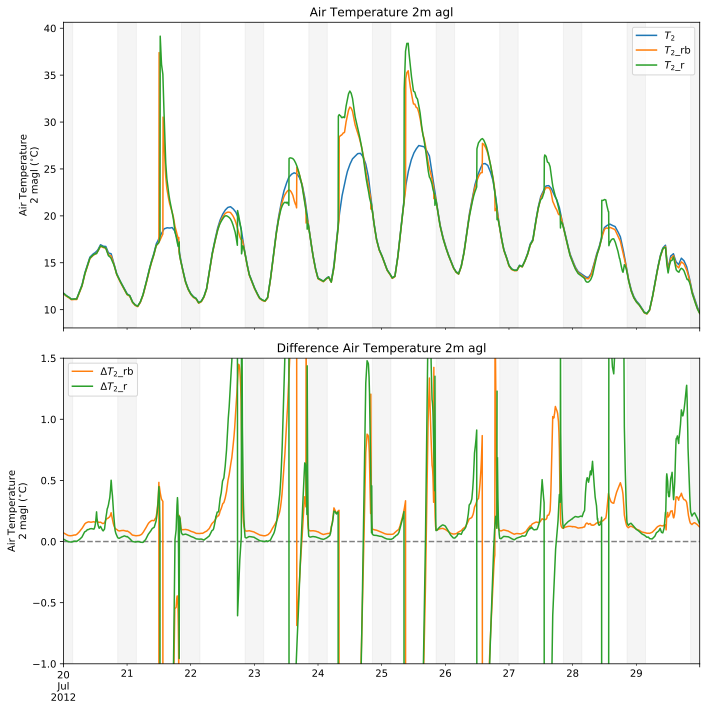

In [23]:
var = 'T2'
fig, axes = plt.subplots(2, 1, sharex=True)
a = df_merge.loc[s:e,[var,(var +'_rb'),(var +'_r')]].rename(columns=dict_var_disp)\
    .plot(ax=axes[0],figsize=(size),title=dict_var_title[var])
b = df_merge.loc[s:e,[(var+'_rb_d'),(var +'_r_d') ]].rename(columns=dict_var_disp)\
    .plot(ax=axes[1],figsize=(size),title=('Difference ' + dict_var_title[var]),color=clr)
plt.hlines(0,s,'2012 08',linestyles='--',colors='grey')
plt.ylim(-1,1.5)

for i in [a,b]:
    night(i)
    i.legend()
    i.set_ylabel(dict_var_ylabel[var])
    i.set_xlabel('')
fig.tight_layout()

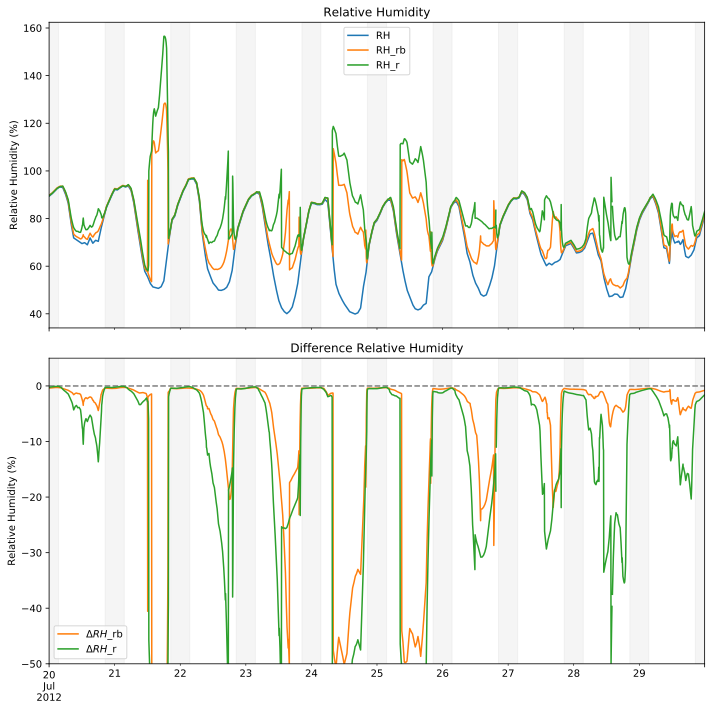

In [24]:
var = 'RH2'
fig, axes = plt.subplots(2, 1, sharex=True)
a = df_merge.loc[s:e,[var,(var +'_rb'),(var +'_r')]].rename(columns=dict_var_disp)\
    .plot(ax=axes[0],figsize=(size),title=dict_var_title[var])
b = df_merge.loc[s:e,[(var+'_rb_d'),(var +'_r_d') ]].rename(columns=dict_var_disp)\
    .plot(ax=axes[1],figsize=(size),title=('Difference ' + dict_var_title[var]),color=clr)
plt.hlines(0,s,'2012 08',linestyles='--',colors='grey')
plt.ylim(-50,5)

for i in [a,b]:
    night(i)
    i.legend()
    i.set_ylabel(dict_var_ylabel[var])
    i.set_xlabel('')
fig.tight_layout()

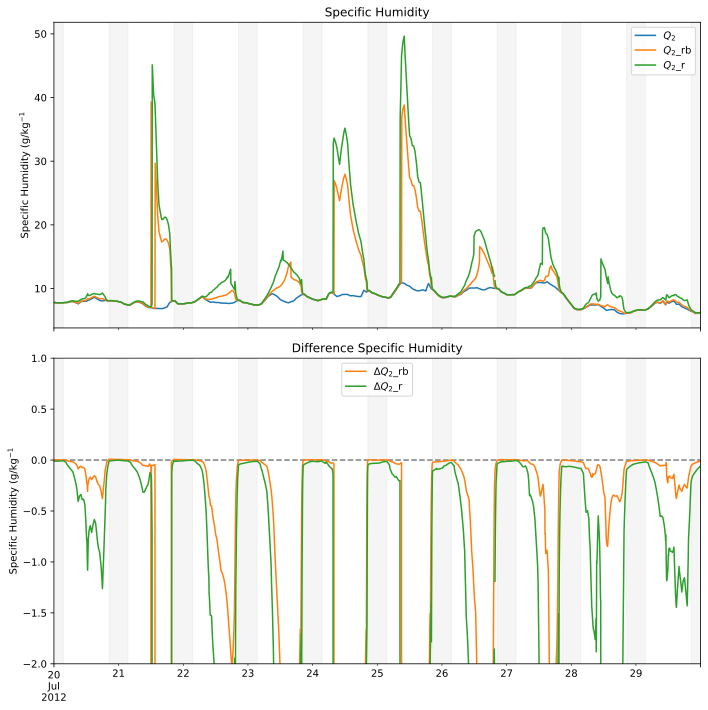

In [25]:
var = 'Q2'
fig, axes = plt.subplots(2, 1, sharex=True)
a = df_merge.loc[s:e,[var,(var +'_rb'),(var +'_r')]].rename(columns=dict_var_disp)\
    .plot(ax=axes[0],figsize=(size),title=dict_var_title[var])
b = df_merge.loc[s:e,[(var+'_rb_d'),(var +'_r_d') ]].rename(columns=dict_var_disp)\
    .plot(ax=axes[1],figsize=(size),title=('Difference ' + dict_var_title[var]),color=clr)
plt.hlines(0,s,'2012 08',linestyles='--',colors='grey')
plt.ylim(-2,1)

for i in [a,b]:
    night(i)
    i.legend()
    i.set_ylabel(dict_var_ylabel[var])
    i.set_xlabel('')
fig.tight_layout()


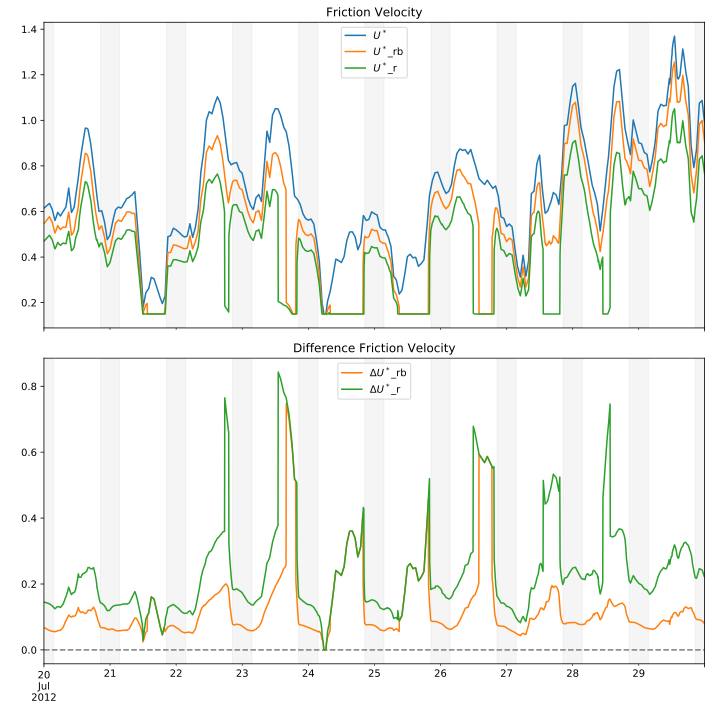

In [26]:
var = 'UStar'
fig, axes = plt.subplots(2, 1, sharex=True)
a = df_merge.loc[s:e,[var,(var +'_rb'),(var +'_r')]].rename(columns=dict_var_disp)\
    .plot(ax=axes[0],figsize=(size),title=dict_var_title[var])
b = df_merge.loc[s:e,[(var+'_rb_d'),(var +'_r_d') ]].rename(columns=dict_var_disp)\
    .plot(ax=axes[1],figsize=(size),title=('Difference ' + dict_var_title[var]),color=clr)
plt.hlines(0,s,'2012 08',linestyles='--',colors='grey')

for i in [a,b]:
    night(i)
    i.legend()
    i.set_ylabel(dict_var_ylabel[var])
    i.set_xlabel('')
fig.tight_layout()

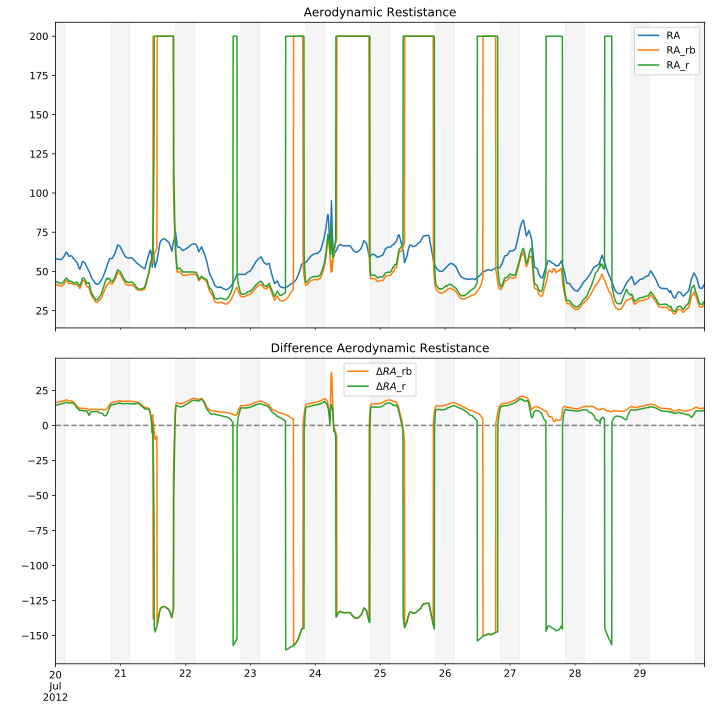

In [27]:
var = 'RA'
fig, axes = plt.subplots(2, 1, sharex=True)
a = df_merge.loc[s:e,[var,(var +'_rb'),(var +'_r')]].rename(columns=dict_var_disp)\
    .plot(ax=axes[0],figsize=(size),title=dict_var_title[var])
b = df_merge.loc[s:e,[(var+'_rb_d'),(var +'_r_d') ]].rename(columns=dict_var_disp)\
    .plot(ax=axes[1],figsize=(size),title=('Difference ' + dict_var_title[var]),color=clr)
plt.hlines(0,s,'2012 08',linestyles='--',colors='grey')

for i in [a,b]:
    night(i)
    i.legend()
    i.set_ylabel(dict_var_ylabel[var])
    i.set_xlabel('')
fig.tight_layout()

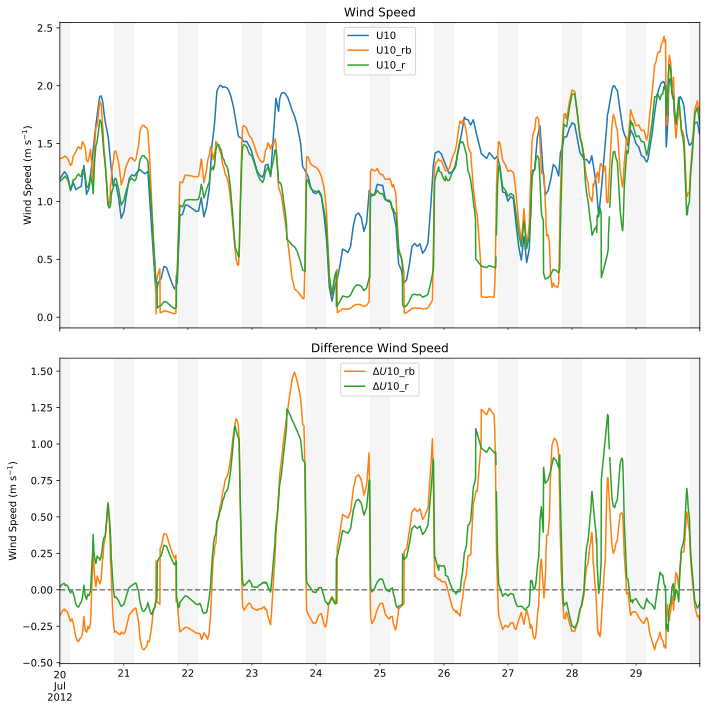

In [28]:
var = 'U10'
fig, axes = plt.subplots(2, 1, sharex=True)
a = df_merge.loc[s:e,[var,(var +'_rb'),(var +'_r')]].rename(columns=dict_var_disp)\
    .plot(ax=axes[0],figsize=(size),title=dict_var_title[var])
b = df_merge.loc[s:e,[(var+'_rb_d'),(var +'_r_d') ]].rename(columns=dict_var_disp)\
    .plot(ax=axes[1],figsize=(size),title=('Difference ' + dict_var_title[var]),color=clr)
plt.hlines(0,s,'2012 08',linestyles='--',colors='grey')

for i in [a,b]:
    night(i)
    i.legend()
    i.set_ylabel(dict_var_ylabel[var])
    i.set_xlabel('')
fig.tight_layout()

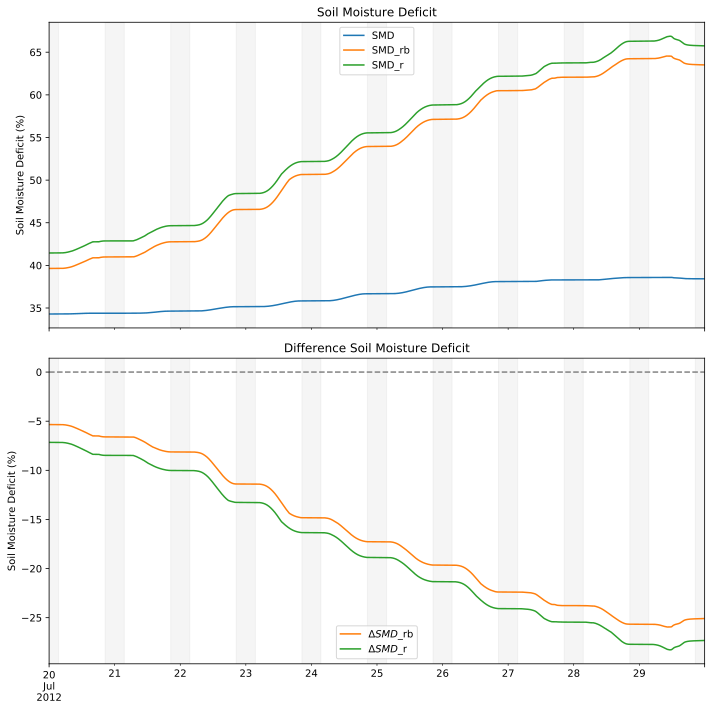

In [29]:
var = 'SMD'
fig, axes = plt.subplots(2, 1, sharex=True)
a = df_merge.loc[s:e,[var,(var +'_rb'),(var +'_r')]].rename(columns=dict_var_disp)\
    .plot(ax=axes[0],figsize=(size),title=dict_var_title[var])
b = df_merge.loc[s:e,[(var+'_rb_d'),(var +'_r_d') ]].rename(columns=dict_var_disp)\
    .plot(ax=axes[1],figsize=(size),title=('Difference ' + dict_var_title[var]),color=clr)
plt.hlines(0,s,'2012 08',linestyles='--',colors='grey')

for i in [a,b]:
    night(i)
    i.legend()
    i.set_ylabel(dict_var_ylabel[var])
    i.set_xlabel('')
fig.tight_layout()

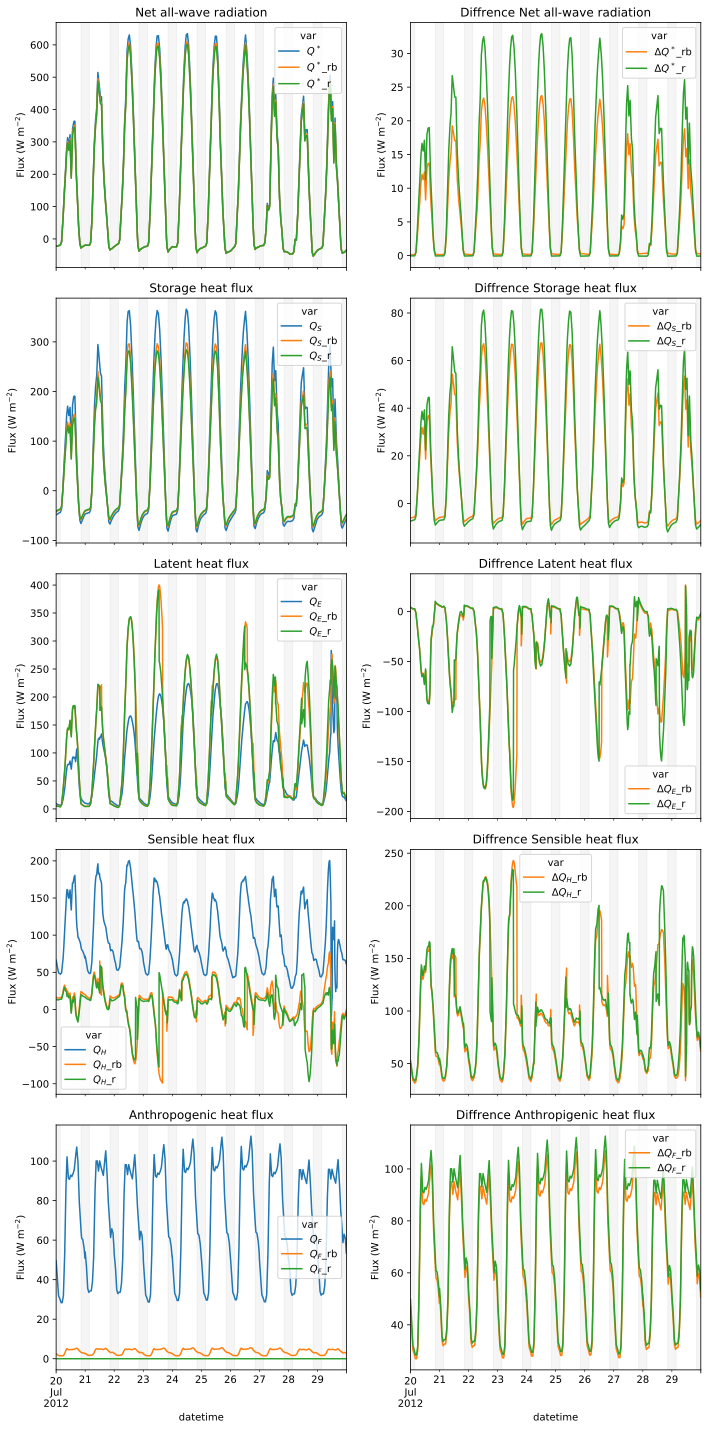

In [30]:
fsize=(10,20)
fig, axes = plt.subplots(5, 2, sharex=True)
clr= ('#ff7f0e','#2ca02c')

a = df_merge.loc[s : e ,['QN','QN_rb','QN_r']].rename(columns=dict_var_disp).plot(ax=axes[0,0],figsize=fsize,title='Net all-wave radiation')
b = df_merge.loc[s : e ,['QN_rb_d','QN_r_d']].rename(columns=dict_var_disp).plot(ax=axes[0,1],figsize=fsize,title='Diffrence Net all-wave radiation',color=clr)
c = df_merge.loc[s : e ,['QS','QS_rb','QS_r']].rename(columns=dict_var_disp).plot(ax=axes[1,0],figsize=fsize,title='Storage heat flux')
d = df_merge.loc[s : e ,['QS_rb_d','QS_r_d']].rename(columns=dict_var_disp).plot(ax=axes[1,1],figsize=fsize,title='Diffrence Storage heat flux',color=clr)
e1= df_merge.loc[s : e ,['QE','QE_rb','QE_r']].rename(columns=dict_var_disp).plot(ax=axes[2,0],figsize=fsize,title='Latent heat flux')
f = df_merge.loc[s : e ,['QE_rb_d','QE_r_d']].rename(columns=dict_var_disp).plot(ax=axes[2,1],figsize=fsize,title='Diffrence Latent heat flux',color=clr)
g = df_merge.loc[s : e ,['QH','QH_rb','QH_r']].rename(columns=dict_var_disp).plot(ax=axes[3,0],figsize=fsize,title='Sensible heat flux')
h = df_merge.loc[s : e ,['QH_rb_d','QH_r_d']].rename(columns=dict_var_disp).plot(ax=axes[3,1],figsize=fsize,title='Diffrence Sensible heat flux',color=clr)
i = df_merge.loc[s : e ,['QF','QF_rb','QF_r']].rename(columns=dict_var_disp).plot(ax=axes[4,0],figsize=fsize,title='Anthropogenic heat flux')
j = df_merge.loc[s : e ,['QF_rb_d','QF_r_d']].rename(columns=dict_var_disp).plot(ax=axes[4,1],figsize=fsize,title='Diffrence Anthropigenic heat flux',color=clr)
for var in [a,b,c,d,e1,f,g,h,i,j]:
    night(var)
    var.set_ylabel('Flux ($ \mathrm{W \ m^{-2}}$)')
fig.tight_layout()


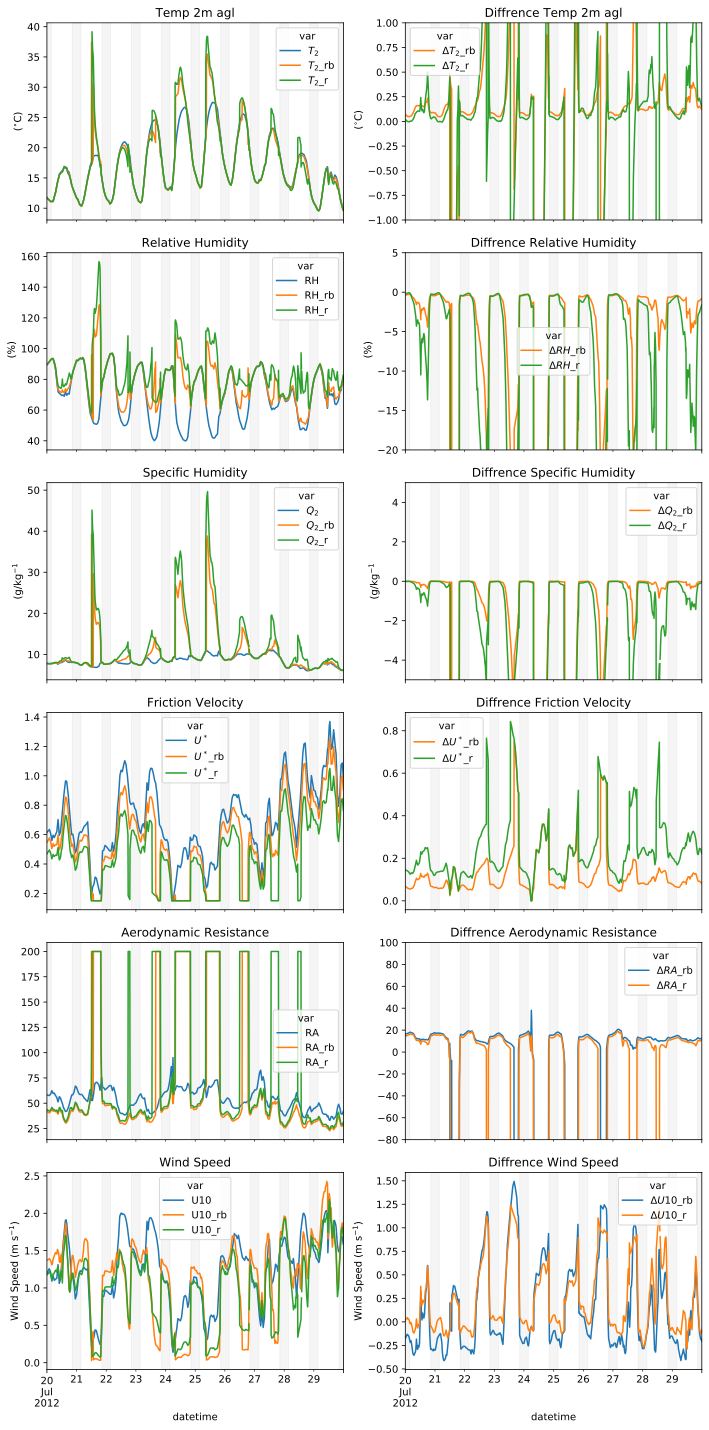

In [31]:
fig, axes = plt.subplots(6, 2, sharex=True)
k = df_merge.loc[s : e ,['T2','T2_rb','T2_r']].rename(columns=dict_var_disp).plot(ax=axes[0,0],figsize=fsize,title='Temp 2m agl')
l = df_merge.loc[s : e ,['T2_rb_d','T2_r_d']].rename(columns=dict_var_disp).plot(ax=axes[0,1],figsize=fsize,title='Diffrence Temp 2m agl',color=clr)
m = df_merge.loc[s : e ,['RH2','RH2_rb','RH2_r']].rename(columns=dict_var_disp).plot(ax=axes[1,0],figsize=fsize,title='Relative Humidity',)
n = df_merge.loc[s : e ,['RH2_rb_d','RH2_r_d']].rename(columns=dict_var_disp).plot(ax=axes[1,1],figsize=fsize,title='Diffrence Relative Humidity',color=clr)
o = df_merge.loc[s : e ,['Q2','Q2_rb','Q2_r']].rename(columns=dict_var_disp).plot(ax=axes[2,0],figsize=fsize,title='Specific Humidity',)
p = df_merge.loc[s : e ,['Q2_rb_d','Q2_r_d']].rename(columns=dict_var_disp).plot(ax=axes[2,1],figsize=fsize,title='Diffrence Specific Humidity',color=clr)
q = df_merge.loc[s : e ,['UStar','UStar_rb','UStar_r']].rename(columns=dict_var_disp).plot(ax=axes[3,0],figsize=fsize,title='Friction Velocity',)
r = df_merge.loc[s : e ,['UStar_rb_d','UStar_r_d']].rename(columns=dict_var_disp).plot(ax=axes[3,1],figsize=fsize,title='Diffrence Friction Velocity',color=clr)
s1 = df_merge.loc[s : e ,['RA','RA_rb','RA_r']].rename(columns=dict_var_disp).plot(ax=axes[4,0],figsize=fsize,title='Aerodynamic Resistance',)
t = df_merge.loc[s : e ,['RA_rb_d','RA_r_d']].rename(columns=dict_var_disp).plot(ax=axes[4,1],figsize=fsize,title='Diffrence Aerodynamic Resistance')
u = df_merge.loc[s : e ,['U10','U10_rb','U10_r']].plot(ax=axes[5,0],figsize=fsize,title='Wind Speed')
v = df_merge.loc[s : e ,['U10_rb_d','U10_r_d']].rename(columns=dict_var_disp).plot(ax=axes[5,1],figsize=fsize,title='Diffrence Wind Speed')

axes[0,0].set_ylabel('($^{\\circ}}$C)')
axes[0,1].set_ylabel(' ($^{\\circ}}$C)')
axes[1,0].set_ylabel(' (%)')
axes[1,1].set_ylabel(' (%)')
axes[2,0].set_ylabel('(g/$ \mathrm{kg^{-1}}$')
axes[2,1].set_ylabel('(g/$ \mathrm{kg^{-1}}$')
axes[3,0].set_ylabel(' ')
axes[3,1].set_ylabel(' ')
axes[4,0].set_ylabel(' ')
axes[4,1].set_ylabel(' ')
axes[5,0].set_ylabel('Wind Speed (m $\mathrm{s^{-1}}$)')
axes[5,1].set_ylabel('Wind Speed (m $\mathrm{s^{-1}}$)')
l.set_ylim([-1,1])
n.set_ylim([-20,5])
p.set_ylim([-5,5])
t.set_ylim([-80,100])
for var in [k,l,m,n,o,p,q,r,s1,t,u,v]:
    night(var)
fig.tight_layout()




## Test RSL-Plot

In [32]:
s0 = '2012 07 24 00:00'
s6 = '2012 07 25 03:30'
s12= '2012 07 25 12:00'
s18= '2012 07 25 18:00'
s24= '2012 07 26 00:00'

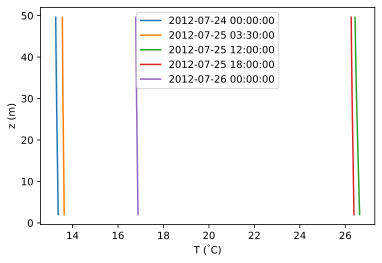

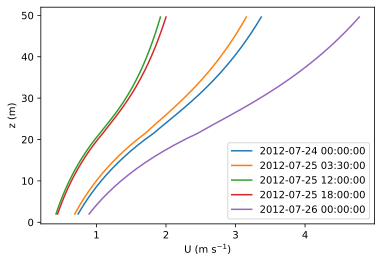

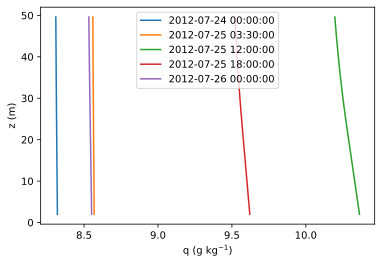

In [33]:
t0  = df_output_rsl_g.loc[s0 : s0]
t6  = df_output_rsl_g.loc[s6 : s6]
t12 = df_output_rsl_g.loc[s12:s12]
t18 = df_output_rsl_g.loc[s18:s18]
t24 = df_output_rsl_g.loc[s24:s24]
df_rsl = pd.concat([t0,t6,t12,t18,t24],join='inner')

sp.util.plot_rsl(df_rsl,'T');
sp.util.plot_rsl(df_rsl,'U');
sp.util.plot_rsl(df_rsl,'q');

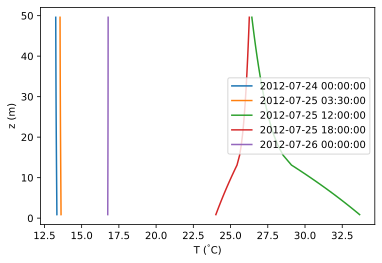

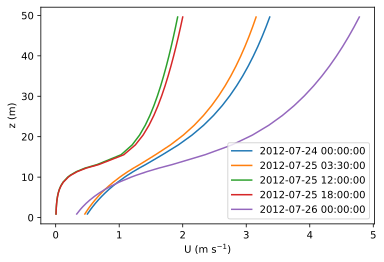

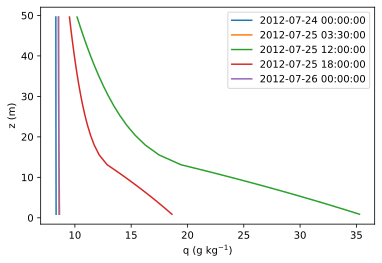

In [34]:
# Rural Conditions _r

t0_r  = df_output_rsl_r_g.loc[s0 : s0]
t6_r  = df_output_rsl_r_g.loc[s6 : s6]
t12_r = df_output_rsl_r_g.loc[s12:s12]
t18_r = df_output_rsl_r_g.loc[s18:s18]
t24_r = df_output_rsl_r_g.loc[s24:s24]
df_rsl_r = pd.concat([t0_r,t6_r,t12_r,t18_r,t24_r],join='inner')

sp.util.plot_rsl(df_rsl_r,'T');
sp.util.plot_rsl(df_rsl_r,'U');
sp.util.plot_rsl(df_rsl_r,'q');

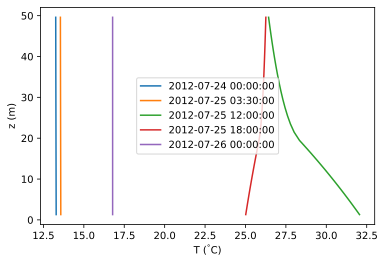

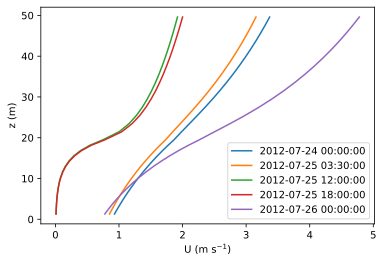

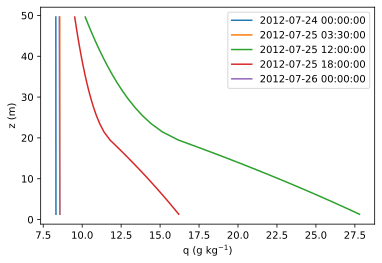

In [35]:
# RuralBuildings _rb

t0_rb  = df_output_rsl_rb_g.loc[s0 : s0]
t6_rb  = df_output_rsl_rb_g.loc[s6 : s6]
t12_rb = df_output_rsl_rb_g.loc[s12:s12]
t18_rb = df_output_rsl_rb_g.loc[s18:s18]
t24_rb = df_output_rsl_rb_g.loc[s24:s24]
df_rsl_rb = pd.concat([t0_rb,t6_rb,t12_rb,t18_rb,t24_rb],join='inner')

sp.util.plot_rsl(df_rsl_rb,'T');
sp.util.plot_rsl(df_rsl_rb,'U');
sp.util.plot_rsl(df_rsl_rb,'q');